In [52]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

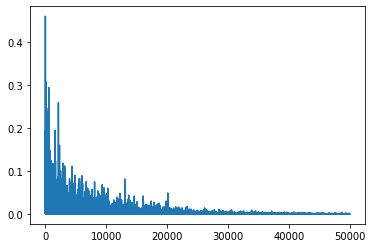

In [53]:
# station = "Bawana, Delhi - DPCC"
# station = "Ashok Vihar, Delhi - DPCC"
station = ["Mandir Marg, Delhi - DPCC"]
date = "2022-03-01 00:30:00"
loss_history = np.load(f"/home/patel_zeel/delhi_aq/delhi_aq/spatial_interpolation/results/cnp_loss_history_{station}.npy")
plt.plot(loss_history[100:]);

In [54]:
mean_df = pd.read_csv("results/loocv_mean")
mean_df["time"] = pd.to_datetime(mean_df["time"], format="%Y-%m-%d %H:%M:%S")
mean_df.set_index("time", inplace=True)
mean_df = mean_df[date]

idw_df = pd.read_csv(f"results/loocv_idw_p=2")
idw_df["time"] = pd.to_datetime(idw_df["time"], format="%Y-%m-%d %H:%M:%S")
idw_df.set_index("time", inplace=True)
idw_df = idw_df[date]

cnp_df = pd.read_csv(f"results/cnp_result_{station}.csv")
cnp_df["time"] = pd.to_datetime(cnp_df["time"], format="%Y-%m-%d %H:%M:%S")
cnp_df.set_index("time", inplace=True)
cnp_df = cnp_df[date]

mean_gt = mean_df[mean_df.station == station[0]]["PM2.5"]
mean_series = mean_df[mean_df.station == station[0]]["PM2.5_pred"]
idw_series = idw_df[idw_df.station == station[0]]["PM2.5_pred"]
cnp_series = cnp_df["0"]

KeyError: '2022-03-01 00:30:00'

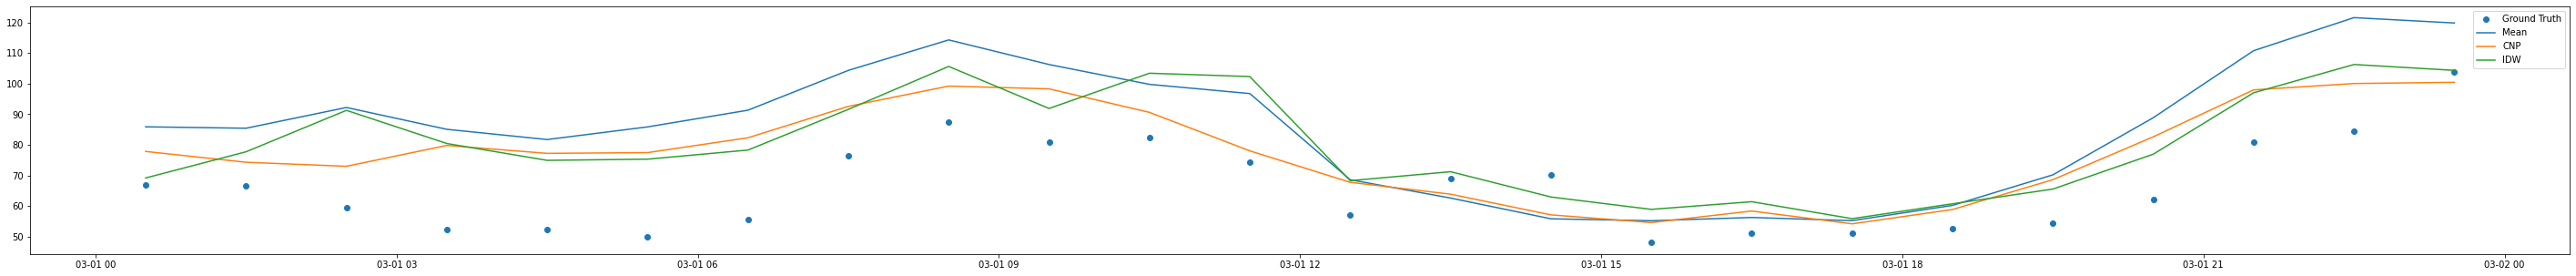

In [46]:
fig, ax = plt.subplots(figsize=(50, 5))

ax.scatter(mean_gt.index, mean_gt, label="Ground Truth");
ax.plot(mean_series.index, mean_series, label="Mean");
ax.plot(cnp_series.index, cnp_series, label="CNP")
ax.plot(idw_series.index, idw_series, label="IDW")
ax.legend();

In [47]:
rmse_mean = np.sqrt(np.mean((mean_gt - mean_series) ** 2))
rmse_cnp = np.sqrt(np.mean((mean_gt - cnp_series) ** 2))
rmse_idw = np.sqrt(np.mean((mean_gt - idw_series) ** 2))
print(f"RMSE Mean: {rmse_mean}")
print(f"RMSE CNP: {rmse_cnp}")
print(f"RMSE IDW: {rmse_idw}")

RMSE Mean: 23.482762951894152
RMSE CNP: 15.279352748008025
RMSE IDW: 17.156514115375767


In [48]:
assert mean_gt.index.equals(cnp_series.index)

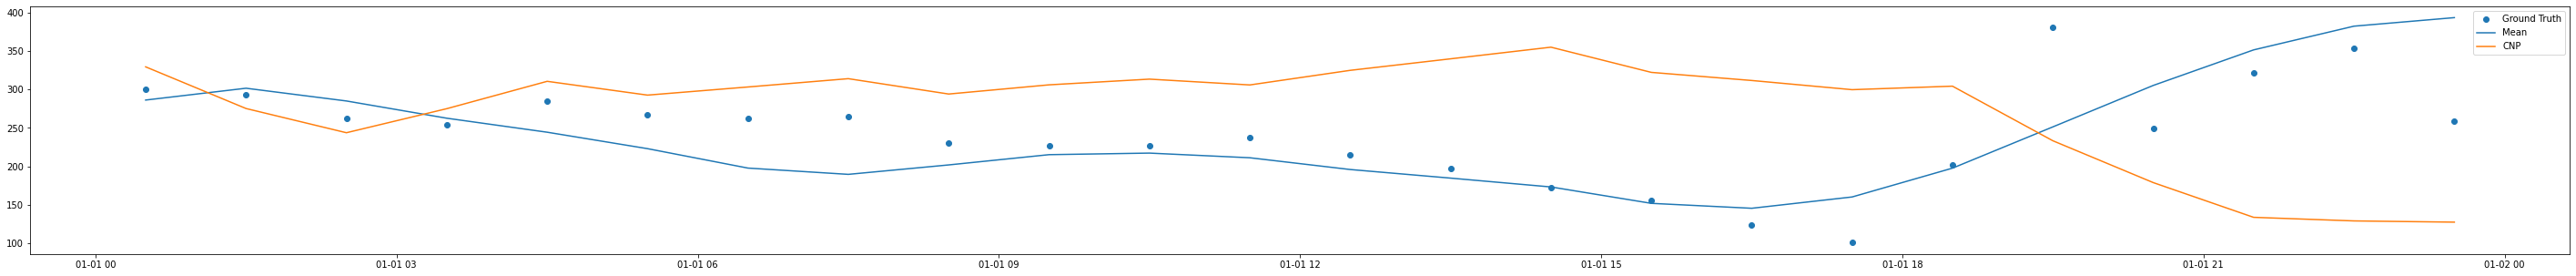

RMSE Mean: 50.04913728237685
RMSE CNP: 118.58723248513336